In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df_01 = pd.read_csv("./data/MEDICINE_202301.csv")
df_02 = pd.read_csv("./data/MEDICINE_202302.csv")
df_03 = pd.read_csv("./data/MEDICINE_202303.csv")
df_04 = pd.read_csv("./data/MEDICINE_202304.csv")
df_05 = pd.read_csv("./data/MEDICINE_202305.csv")
df_06 = pd.read_csv("./data/MEDICINE_202306.csv")
df_07 = pd.read_csv("./data/MEDICINE_202307.csv")
df_08 = pd.read_csv("./data/MEDICINE_202308.csv")
df_09 = pd.read_csv("./data/MEDICINE_202309.csv")
df_10 = pd.read_csv("./data/MEDICINE_202310.csv")
df_11 = pd.read_csv("./data/MEDICINE_202311.csv")
df_12 = pd.read_csv("./data/MEDICINE_202312.csv")

In [95]:
df_list = [df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12]
df = pd.concat(df_list, axis=0)

In [96]:
column_names = ["처방년도", "처방월", "주성분코드", "연령대", "성별", "지역", "요양기관 종별", "원내․원외", "총 처방건 수", "총 금액", "총 환자 수"]
df.columns = column_names

In [97]:
df.loc[df["연령대"] == 0, "연령대"] = "10대 미만"
df.loc[df["연령대"] == 10, "연령대"] = "10대"
df.loc[df["연령대"] == 20, "연령대"] = "20대"
df.loc[df["연령대"] == 30, "연령대"] = "30대"
df.loc[df["연령대"] == 40, "연령대"] = "40대"
df.loc[df["연령대"] == 50, "연령대"] = "50대"
df.loc[df["연령대"] == 60, "연령대"] = "60대"
df.loc[df["연령대"] == 70, "연령대"] = "70대"
df.loc[df["연령대"] == 80, "연령대"] = "80대"
df.loc[df["연령대"] == 90, "연령대"] = "90대"
df

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_1403/2206788537.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10대 미만' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["연령대"] == 0, "연령대"] = "10대 미만"


,처방년도,처방월,주성분코드,연령대,성별,지역,요양기관 종별,원내․원외,총 처방건 수,총 금액,총 환자 수
0,2023,1,1009,10대 미만,2,29,3,OUT,3,2256,3
1,2023,1,1041,10대 미만,2,44,3,OUT,3,2265,3
2,2023,1,1043,60대,2,11,3,OUT,3,58565,3
3,2023,1,1046,20대,2,42,3,OUT,3,25050,3
4,2023,1,1046,30대,2,50,3,OUT,3,41760,3
...,...,...,...,...,...,...,...,...,...,...,...
639228,2023,12,7245,70대,1,47,3,OUT,4,165150,4
639229,2023,12,7245,70대,2,29,3,OUT,4,132120,4
639230,2023,12,7245,70대,2,43,3,OUT,4,165150,4
639231,2023,12,7245,70대,2,47,3,OUT,7,184968,6


In [98]:
sido_nm_mapping = {
    11: '서울특별시',
    26: '부산광역시',
    27: '대구광역시',
    28: '인천광역시',
    29: '광주광역시',
    30: '대전광역시',
    31: '울산광역시',
    36: '세종특별자치시',
    41: '경기도',
    42: '강원도',
    43: '충청북도',
    44: '충청남도',
    45: '전라북도',
    46: '전라남도',
    47: '경상북도',
    48: '경상남도',
    50: '제주특별자치도'
}

# '지역' 컬럼을 SIDO 코드에 따라 SIDO_NM 값으로 변환
df['지역'] = df['지역'].map(sido_nm_mapping)
df["지역"].value_counts()

지역
서울특별시      676093
경기도        671987
부산광역시      560797
경상남도       535152
대구광역시      507891
인천광역시      486360
전라북도       470692
광주광역시      464197
전라남도       439378
충청남도       438371
강원도        435362
대전광역시      414032
충청북도       405521
경상북도       382430
울산광역시      363578
제주특별자치도    236473
세종특별자치시    142067
Name: count, dtype: int64

In [100]:
df.to_csv("./data/2023_데이터.csv")

In [5]:
df_col = {"USE_YEAR" : "처방년도", "USE_MONTH" : "처방월", "WK_COMPN_4" : "주성분코드", "AGE_G" : "연령대", "SEX_TYPE" : "성별", "SIDO" : "지역", "YOYANG_CLSFC_CD_ADJ" : "요양기관", "OUT_IN_HOS" : "원내/원외", "PRSCRPTN_TNDN_CNT" : "총처방건", "PATIENT_CNT" : "총환자", "PRSCRPTN_AMT" : "총금액"}
df.rename(columns=df_col, inplace=True)
df

,처방년도,처방월,주성분코드,연령대,성별,지역,요양기관,원내/원외,총처방건,총금액,총환자
0,2023,1,1009,0,2,29,3,OUT,3,2256,3
1,2023,1,1041,0,2,44,3,OUT,3,2265,3
2,2023,1,1043,60,2,11,3,OUT,3,58565,3
3,2023,1,1046,20,2,42,3,OUT,3,25050,3
4,2023,1,1046,30,2,50,3,OUT,3,41760,3
...,...,...,...,...,...,...,...,...,...,...,...
639228,2023,12,7245,70,1,47,3,OUT,4,165150,4
639229,2023,12,7245,70,2,29,3,OUT,4,132120,4
639230,2023,12,7245,70,2,43,3,OUT,4,165150,4
639231,2023,12,7245,70,2,47,3,OUT,7,184968,6


In [6]:
# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [7]:
# 연도별 그룹화
df_yearly = df.groupby('처방년도').sum().reset_index()
# 월별 그룹화
df_monthly = df.groupby('처방월').sum().reset_index()

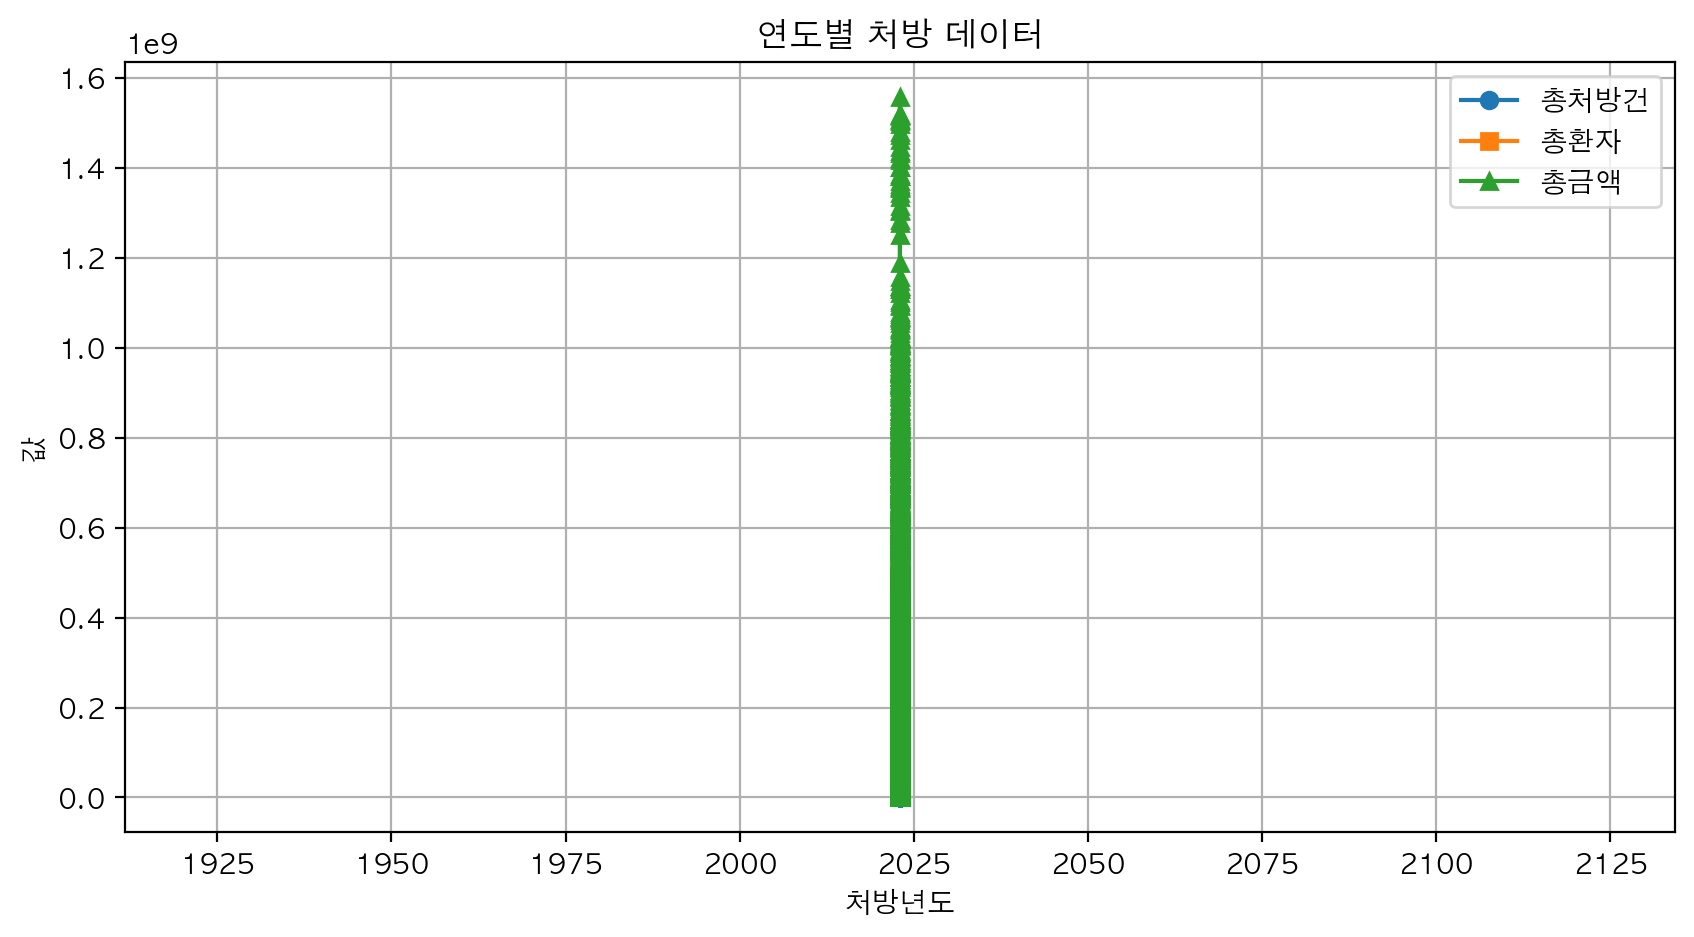

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df['처방년도'], df['총처방건'], marker='o', label='총처방건')
plt.plot(df['처방년도'], df['총환자'], marker='s', label='총환자')
plt.plot(df['처방년도'], df['총금액'], marker='^', label='총금액')
plt.title('연도별 처방 데이터')
plt.xlabel('처방년도')
plt.ylabel('값')
plt.legend()
plt.grid(True)
plt.show()

/Users/shinminseog/opt/anaconda3/envs/dl/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


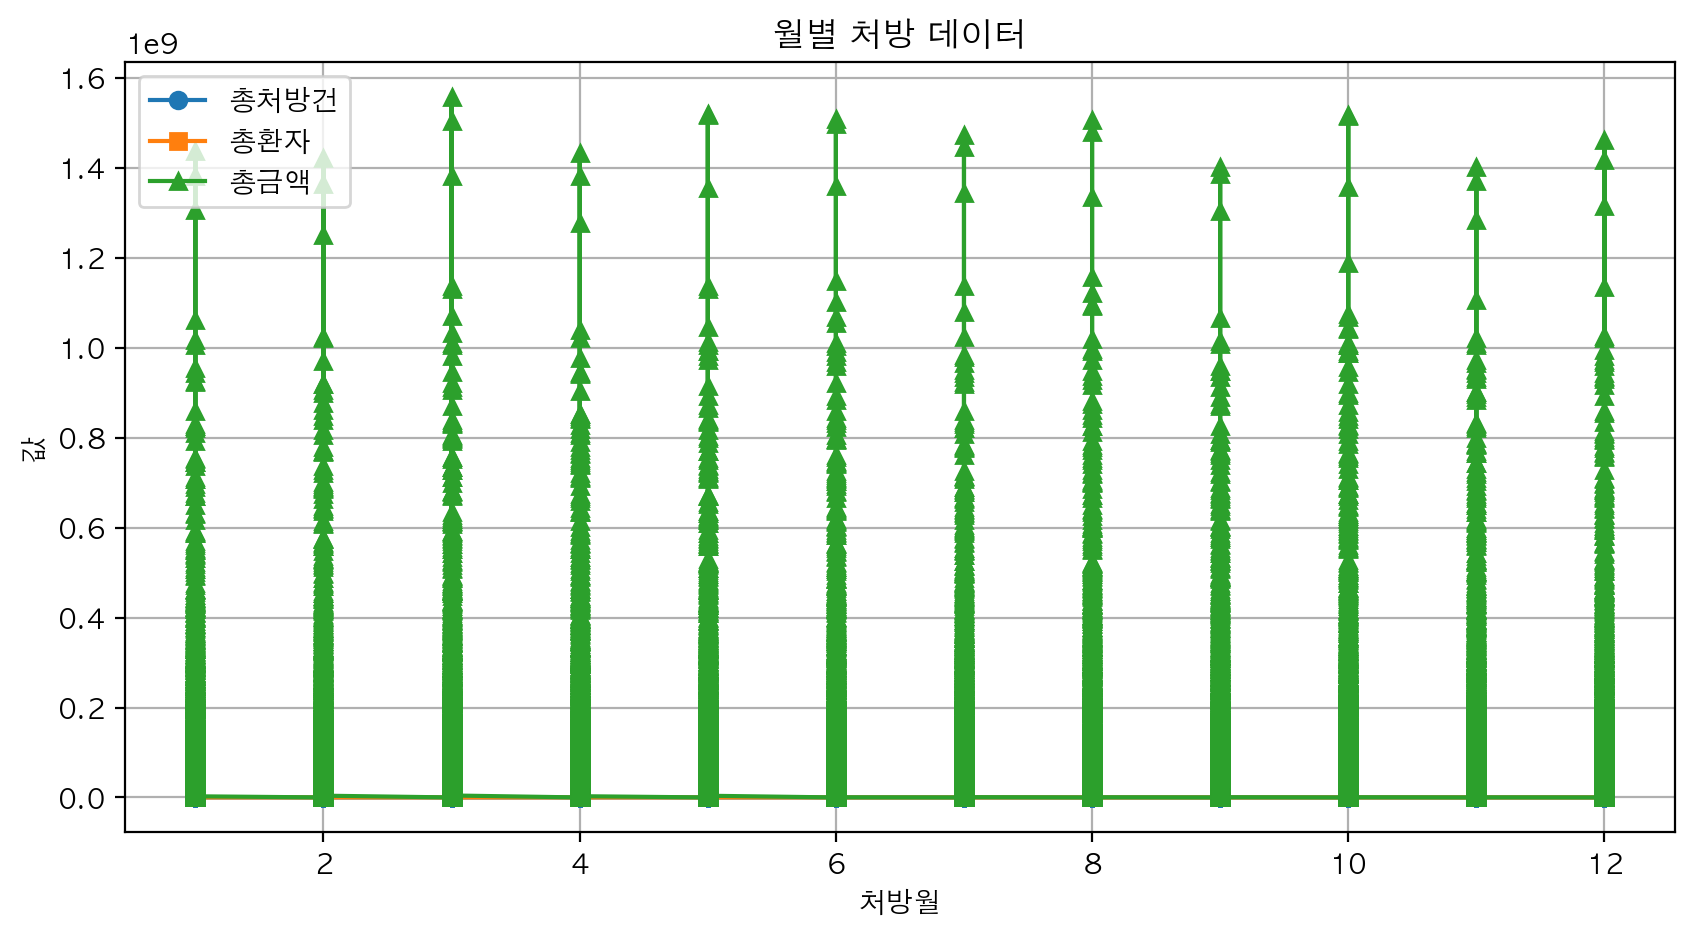

In [8]:

# 월별 시각화
plt.figure(figsize=(10, 5))
plt.plot(df['처방월'], df['총처방건'], marker='o', label='총처방건')
plt.plot(df['처방월'], df['총환자'], marker='s', label='총환자')
plt.plot(df['처방월'], df['총금액'], marker='^', label='총금액')
plt.title('월별 처방 데이터')
plt.xlabel('처방월')
plt.ylabel('값')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
test = pd.pivot_table(data = df, index = ["주성분코드", "연령대", "처방월"], values = "총처방건", aggfunc = "sum").sort_values(by = "총처방건", ascending = False)
test2 = test.head(20)
test2 = test2.reset_index()
test2

,주성분코드,연령대,처방월,총처방건
0,1831,0,12,2750427
1,5308,0,4,2590217
2,1831,0,11,2559074
3,1018,0,12,2511214
4,1831,0,4,2488475
5,1018,0,11,2393562
6,5308,0,3,2359459
7,1018,0,4,2357922
8,5308,0,12,2226412
9,5308,0,11,2205816


In [79]:
pivot_df = df.pivot_table(index=['처방월', '주성분코드', '연령대', '성별'], values=['총처방건'], aggfunc="sum")
pivot_df = pivot_df.sort_values(by=['처방월', '총처방건'], ascending=[True, False]).groupby('처방월').head(5)

In [87]:
df['주성분코드'].value_counts()

주성분코드
1014    29600
1318    29502
1018    29479
1573    29388
4210    29061
        ...  
5671       26
7239       23
1736       12
1980        7
7244        4
Name: count, Length: 787, dtype: int64

In [92]:
pivot_df.to_csv("./data/2023_주성분코드별_총처방건(연령대,성별)_top5.csv")

In [72]:
pivot_df = df.pivot_table(index=['처방월', '주성분코드'], values=['총처방건'], aggfunc="sum").sort_values(by="총처방건", ascending=False).groupby('처방월').head(5).sort_values(by="처방월")

In [93]:
pivot_df

총처방건
처방월 주성분코드 연령대 성별         
1   5308  0   1    793514
              2    744216
    2229  60  2    707643
    1018  0   1    670568
    1831  0   1    653270
2   5308  0   1    914652
              2    869352
    1018  0   1    755378
    2209  0   1    755147
    1831  0   1    700544
3   5308  0   1   1205309
              2   1154150
    1018  0   1   1015738
    2209  0   1   1014202
    1831  0   1    999257
4   5308  0   1   1325668
    1831  0   1   1301640
    5308  0   2   1264549
    1018  0   1   1226473
    1831  0   2   1186835
5   1831  0   1   1075186
    5308  0   1   1074688
              2   1027267
    1018  0   1   1017328
    1831  0   2    990844
6   5308  0   1    783186
    1831  0   1    774935
    1018  0   1    756685
    5308  0   2    740808
    1831  0   2    702528
7   1831  0   1   1043542
    1018  0   1   1006599
    5308  0   1    971353
    1831  0   2    941997
    1018  0   2    923249
8   5308  0   1    790050
    1018  0   1    765255
    1831  0   1    759272
    5308  0   2    720390
    2229  60  2    713482
9   5308  0   1    967004
    1018  0   1    913164
    1831  0   1    899020
    5308  0   2    898216
    1018  0   2    826023
10  1831  0   1   1130166
    5308  0   1   1088372
    1018  0   1   1077173
    1831  0   2   1021197
    5308  0   2   1018456
11  1831  0   1   1330245
    1018  0   1   1236274
    1831  0   2   1228829
    1018  0   2   1157288
    5308  0   1   1126532
12  1831  0   1   1425080
              2   1325347
    1018  0   1   1292513
              2   1218701
    5308  0   1   1132853

In [58]:
pivot_df_sorted = pivot_df.sort_values(by='총처방건', ascending=False).groupby('처방월').head(5).reset_index()
pivot_df_sorted

,처방월,주성분코드,총처방건
0,12,2229,7831472
1,11,2229,7253230
2,12,1014,6859093
3,5,2229,6769130
4,10,2229,6567252
5,4,2229,6513532
6,12,1831,6442127
7,12,1018,6431851
8,12,1861,6283518
9,3,2229,6204219


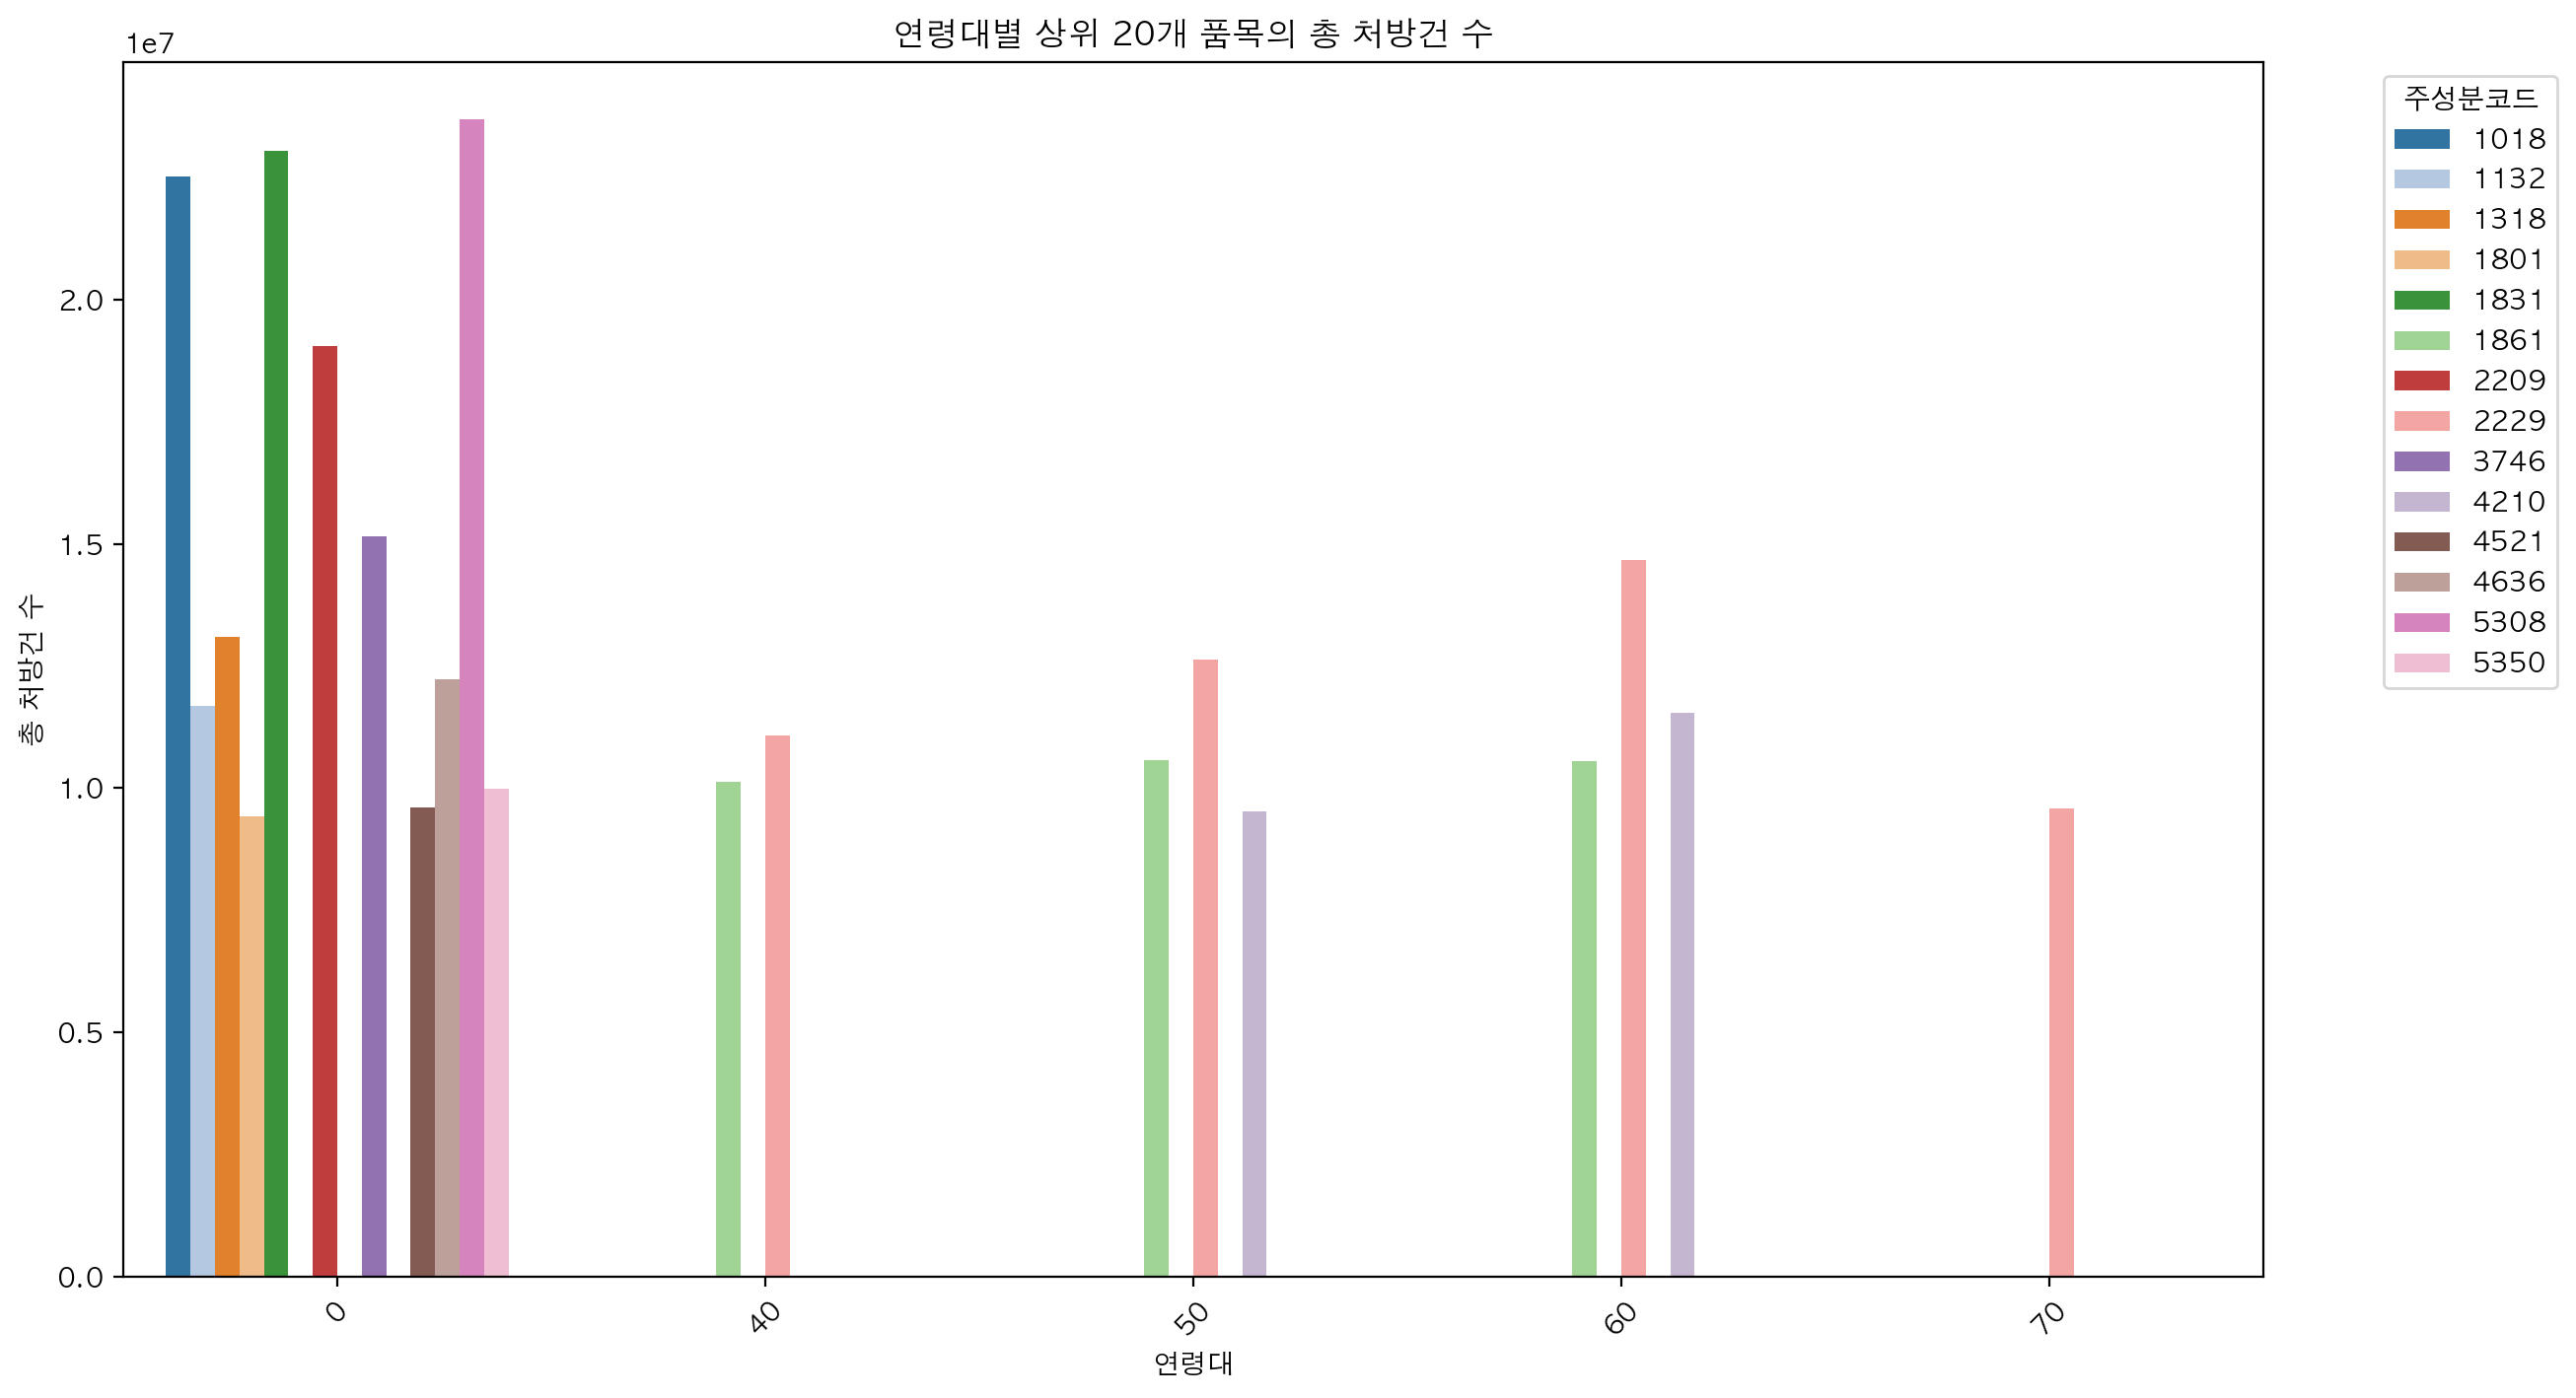

In [20]:
# 나이 그룹별 처방된 약물 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=test2, x='연령대', y='총처방건', hue='주성분코드', palette='tab20')
plt.title('연령대별 상위 20개 품목의 총 처방건 수')
plt.xlabel('연령대')
plt.ylabel('총 처방건 수')
plt.xticks(rotation=45)
plt.legend(title='주성분코드', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()